In [1]:
import librosa
import pandas as pd
import os
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
audio_file_path='UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
print(librosa_audio_data)


[-0.00011783 -0.00017157 -0.00017749 ... -0.04598654 -0.04624664
 -0.05089863]


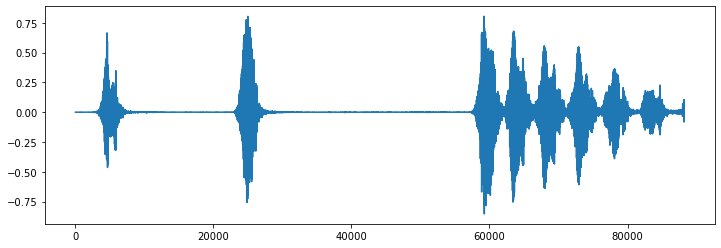

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
#Covert signal mono
wave_sample_rate, wave_audio = wav.read(audio_file_path)

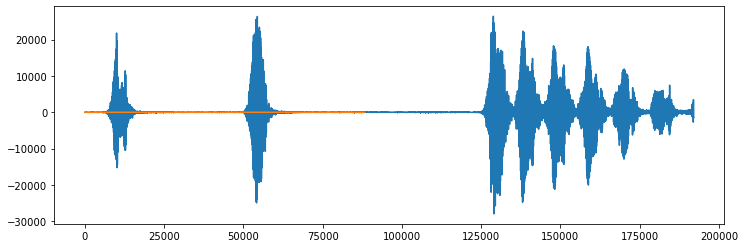

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.plot(librosa_audio_data)

In [6]:
# Feature Exatract
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [7]:
mfccs

array([[-5.2127631e+02, -5.1920068e+02, -5.1859546e+02, ...,
        -4.3563806e+02, -3.9264105e+02, -3.5284695e+02],
       [ 1.4337622e+01,  1.7177921e+01,  1.8103882e+01, ...,
         1.1375925e+02,  1.5130569e+02,  1.7731265e+02],
       [ 1.3526174e+01,  1.6120741e+01,  1.7259270e+01, ...,
         6.4274483e+01,  6.2837280e+01,  5.8452560e+01],
       ...,
       [ 3.5389400e-01, -3.3235970e+00, -4.8356533e+00, ...,
        -5.2698832e+00, -1.1491927e+00, -1.8506811e+00],
       [ 4.5192480e-01, -3.0670590e+00, -4.6473045e+00, ...,
        -3.4223983e+00,  2.5510254e+00,  1.9448149e+00],
       [ 4.3578243e-01, -2.7977815e+00, -4.4126105e+00, ...,
        -2.6713738e+00,  1.3704143e+00,  5.2174580e-01]], dtype=float32)

In [8]:
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:

def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [10]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [07:55,  9.80it/s]C:\Users\nkwij\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [16:57,  9.71it/s]C:\Users\nkwij\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8327it [16:57, 12.70it/s]C:\Users\nkwij\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [17:45,  8.19it/s]


In [11]:

### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [12]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [13]:
X.shape

(8732, 40)

In [14]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [15]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [16]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786109e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
        -3.3844023e+00, -5.2119045e+00, -1.5936136e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537492e-01,  2.7793026e+00],
       ...,
       [-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530845e+00, -8.9652127e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400862e+00, -1.3321608e+00]], dtype=float32)

In [19]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
X_train.shape


(6985, 40)

In [21]:
X_test.shape

(1747, 40)

In [22]:
y_train.shape


(6985, 10)

In [23]:
y_test.shape


(1747, 10)

In [24]:
#model Creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
print(tf.__version__)


2.3.0


In [26]:
### No of classes
num_labels=y.shape[1]

In [27]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [30]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
207/219 [===========================>..] - ETA: 0s - loss: 10.2838 - accuracy: 0.1150
Epoch 00001: val_loss improved from inf to 2.28910, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 9.9105 - accuracy: 0.1147 - val_loss: 2.2891 - val_accuracy: 0.1099
Epoch 2/100
211/219 [===========================>..] - ETA: 0s - loss: 2.5387 - accuracy: 0.1214
Epoch 00002: val_loss improved from 2.28910 to 2.27914, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.5347 - accuracy: 0.1215 - val_loss: 2.2791 - val_accuracy: 0.1156
Epoch 3/100
197/219 [=========================>....] - ETA: 0s - loss: 2.3300 - accuracy: 0.1225
Epoch 00003: val_loss improved from 2.27914 to 2.24704, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 2.3266 - accuracy: 0.1233 - val_loss: 2.2470 - val_acc

Epoch 25/100
197/219 [=========================>....] - ETA: 0s - loss: 1.4830 - accuracy: 0.4727
Epoch 00025: val_loss improved from 1.32473 to 1.27933, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4784 - accuracy: 0.4714 - val_loss: 1.2793 - val_accuracy: 0.5913
Epoch 26/100
195/219 [=========================>....] - ETA: 0s - loss: 1.4667 - accuracy: 0.4812
Epoch 00026: val_loss improved from 1.27933 to 1.27409, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 1.4643 - accuracy: 0.4822 - val_loss: 1.2741 - val_accuracy: 0.5701
Epoch 27/100
216/219 [============================>.] - ETA: 0s - loss: 1.4408 - accuracy: 0.4844
Epoch 00027: val_loss improved from 1.27409 to 1.24427, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.4397 - accuracy: 0.4850 - val_loss: 1.2443 - v

218/219 [============================>.] - ETA: 0s - loss: 1.1613 - accuracy: 0.6003
Epoch 00050: val_loss improved from 0.97291 to 0.96752, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 1.1611 - accuracy: 0.6004 - val_loss: 0.9675 - val_accuracy: 0.6772
Epoch 51/100
199/219 [==========================>...] - ETA: 0s - loss: 1.1404 - accuracy: 0.6102
Epoch 00051: val_loss did not improve from 0.96752
219/219 [==============================] - 0s 2ms/step - loss: 1.1537 - accuracy: 0.6063 - val_loss: 0.9871 - val_accuracy: 0.6743
Epoch 52/100
206/219 [===========================>..] - ETA: 0s - loss: 1.1535 - accuracy: 0.6082
Epoch 00052: val_loss improved from 0.96752 to 0.96074, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 10ms/step - loss: 1.1554 - accuracy: 0.6083 - val_loss: 0.9607 - val_accuracy: 0.6743
Epoch 53/100
207/219 [===========================>..

Epoch 77/100
197/219 [=========================>....] - ETA: 0s - loss: 1.0600 - accuracy: 0.64 - ETA: 0s - loss: 1.0573 - accuracy: 0.6437
Epoch 00077: val_loss did not improve from 0.85932
219/219 [==============================] - 0s 2ms/step - loss: 1.0572 - accuracy: 0.6435 - val_loss: 0.8756 - val_accuracy: 0.7189
Epoch 78/100
211/219 [===========================>..] - ETA: 0s - loss: 1.0696 - accuracy: 0.6374
Epoch 00078: val_loss did not improve from 0.85932
219/219 [==============================] - 0s 2ms/step - loss: 1.0666 - accuracy: 0.6387 - val_loss: 0.8722 - val_accuracy: 0.7207
Epoch 79/100
197/219 [=========================>....] - ETA: 0s - loss: 1.0400 - accuracy: 0.6507
Epoch 00079: val_loss did not improve from 0.85932
219/219 [==============================] - 0s 2ms/step - loss: 1.0363 - accuracy: 0.6485 - val_loss: 0.8817 - val_accuracy: 0.7127
Epoch 80/100
200/219 [==========================>...] - ETA: 0s - loss: 1.0530 - accuracy: 0.6425 ETA: 0s - loss: 1.03

In [31]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7189467549324036


In [32]:
X_test[1]


array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.166929  ,  -18.850813  ,   -0.7415805 ,  -15.99989   ,
        -21.354332  ,    7.650684  ,  -29.031452  ,  -19.142824  ,
         -2.6798913 ,   -8.466883  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336624  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.70152664,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.65529794,  -23.953394  ,
        -15.200551  ,    9.210791  ,   10.4198    ,   -0.5791612 ,
         -1.2440346 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [33]:
model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 2, 4, ..., 1, 9, 2], dtype=int64)

In [35]:
filename="UrbanSound8K/audio/fold3/102105-3-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.5020525e+02  9.7047714e+01 -5.8228188e+01  6.6443281e+00
 -1.8429180e+01  1.8801178e+00 -9.2692814e+00  1.5881079e+00
 -2.0842776e+00  1.1180565e+01 -3.5131490e+00  1.6427004e+01
 -6.9362850e+00  9.2897673e+00 -9.8165636e+00  2.0879076e+00
 -6.5393801e+00  5.1909513e+00 -1.4319205e+00  4.5062032e+00
 -3.1347268e+00  2.9044902e+00 -5.6170707e+00  1.6049151e+00
 -9.0508187e-01  3.5255752e+00  7.5242984e-01  7.3043066e-01
 -2.8977147e-01 -2.6656964e-01  3.9222452e-01 -3.1107986e+00
 -1.8133163e+00 -1.1441075e+00 -1.2925099e+00  8.5602766e-01
  1.3053811e+00  1.8763645e+00  1.1383384e+00  1.6498985e-02]
[[-2.5020525e+02  9.7047714e+01 -5.8228188e+01  6.6443281e+00
  -1.8429180e+01  1.8801178e+00 -9.2692814e+00  1.5881079e+00
  -2.0842776e+00  1.1180565e+01 -3.5131490e+00  1.6427004e+01
  -6.9362850e+00  9.2897673e+00 -9.8165636e+00  2.0879076e+00
  -6.5393801e+00  5.1909513e+00 -1.4319205e+00  4.5062032e+00
  -3.1347268e+00  2.9044902e+00 -5.6170707e+00  1.6049151e+00
  -9.0508187e-01 

array(['children_playing'], dtype='<U16')